In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
import math

In [ ]:
def prediccion(y_test,y_pred):
  validos=0
  no_validos=0
  for i in range(len(y_pred)):
    if y_test.iloc[i]==y_pred[i].astype(int):
      validos=validos+1
    else:
      no_validos=no_validos+1
  return(print("Validos: ",validos," / No validos: ",no_validos))

In [ ]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, annot=True, fmt="d");
    plt.title("Matriz de confusión")
    plt.ylabel('Realidad')
    plt.xlabel('Predicción')
    plt.show()
    print()
    print(classification_report(y_test, pred_y))

In [ ]:
df = pd.read_csv('movies_list_2012-2020.csv')

In [ ]:
df.head()
df_models_total_gross=df_models_total_gross=pd.DataFrame()

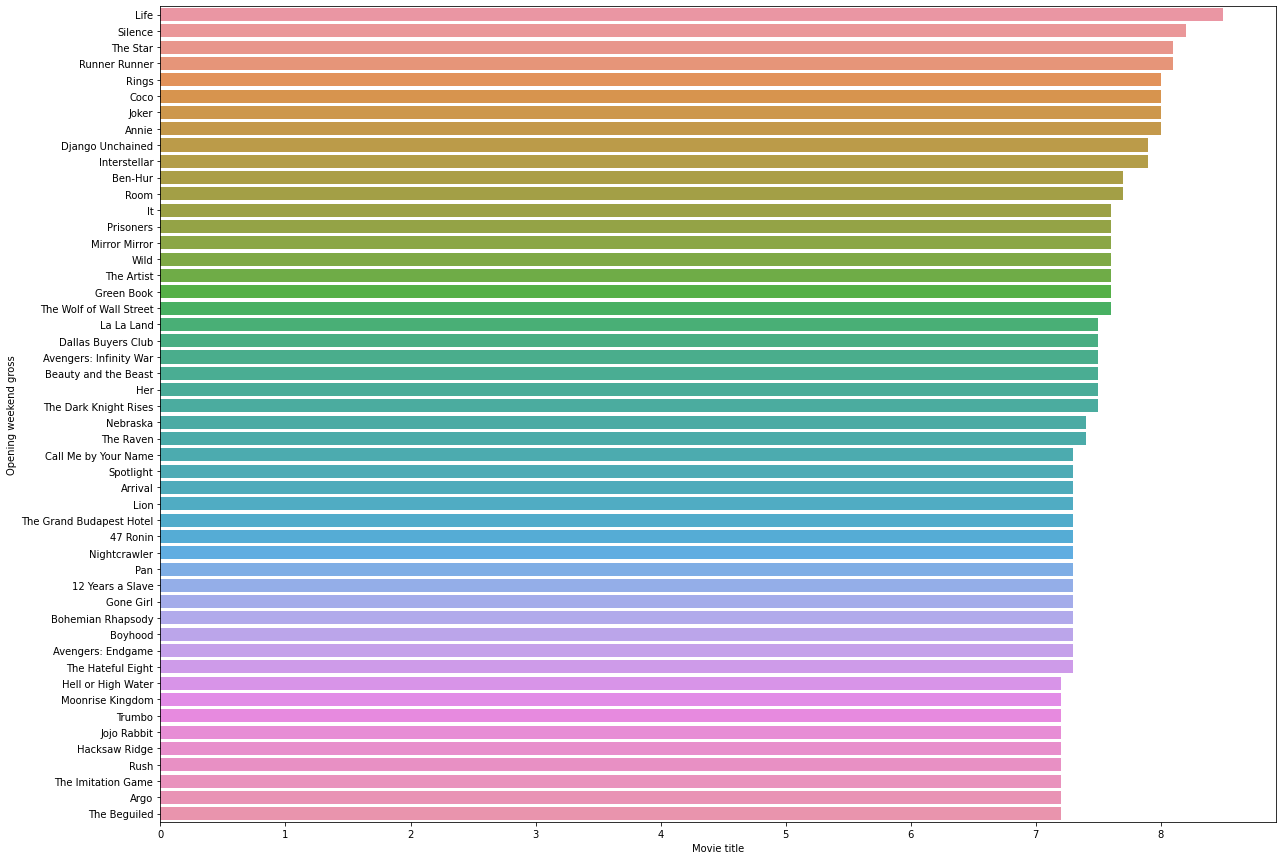

In [ ]:
# TOP 50 movies opening weekend
top_movies_opening_weekend = df[["movie_title", "score"]].sort_values(by="score", ascending=False)
top_movies_opening_weekend[:50]

plt.figure(figsize=(20, 15))
sns.barplot(
    y = "movie_title",
    x = "score",
    data = top_movies_opening_weekend[:50]
)
plt.ylabel("Opening weekend gross")
plt.xlabel("Movie title")

plt.show()

# Pre-analysis

In [ ]:
df = df.drop(columns=['release_date', 'movie_title'], axis=0)
df_original=df

## Differents values

In [ ]:
df['max_theaters'].describe()

count     947.000000
mean     2818.786695
std       971.671773
min       600.000000
25%      2233.000000
50%      3003.000000
75%      3517.000000
max      4802.000000
Name: max_theaters, dtype: float64

In [ ]:
df['score'].describe()

count    947.000000
mean       5.605385
std        0.981683
min        2.500000
25%        4.900000
50%        5.600000
75%        6.300000
max        8.500000
Name: score, dtype: float64

In [ ]:
df['running_time_min'].describe()

count    947.000000
mean     109.280887
std       19.235364
min        4.000000
25%       96.000000
50%      107.000000
75%      121.000000
max      207.000000
Name: running_time_min, dtype: float64

In [ ]:
for col in df.columns.to_list():
  if col.startswith('genre_'):
    print(f'{col}: {df[col].value_counts()[1]}/{len(df)}')

genre_action: 251/947
genre_adventure: 144/947
genre_animation: 83/947
genre_comedy: 330/947
genre_documentary: 6/947
genre_drama: 325/947
genre_fantasy: 150/947
genre_film_noir: 5/947
genre_horror: 107/947
genre_kids: 28/947
genre_musical: 20/947
genre_mystery: 46/947
genre_romance: 95/947
genre_sci-fi: 139/947
genre_tv_series: 3/947
genre_thriller: 215/947
genre_war: 22/947
genre_western: 9/947


## Outliers

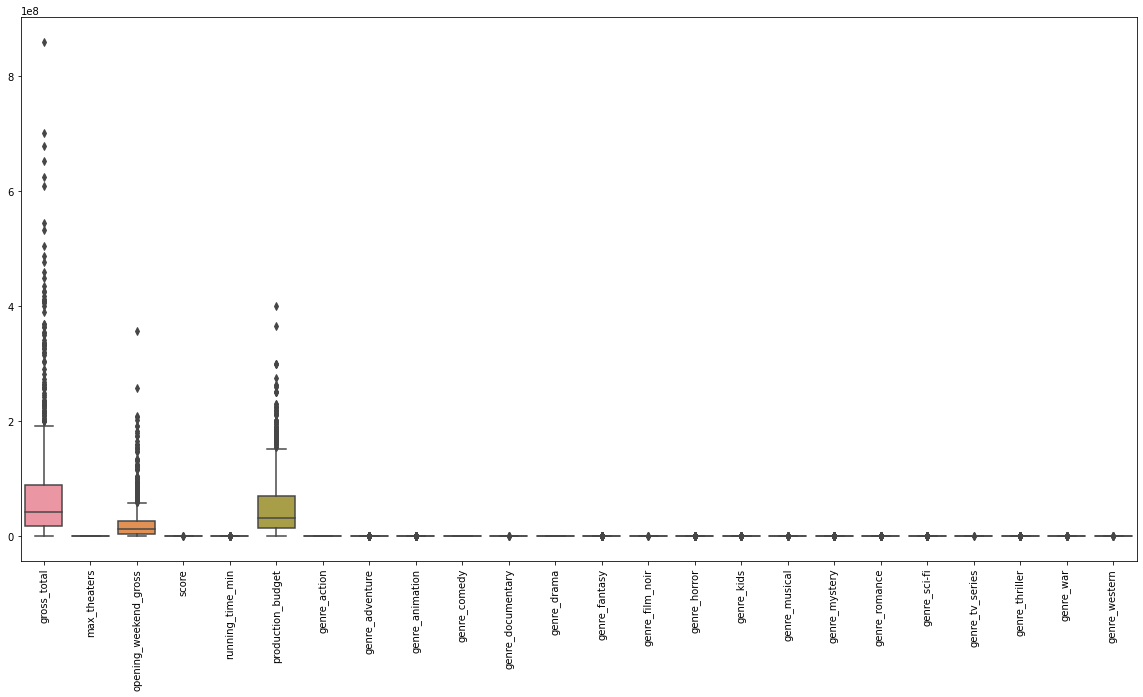

In [ ]:
plt.figure(figsize=(20, 10))
ax = sns.boxplot(data=df)
_ = ax.set_xticklabels(df.keys(), rotation=90)

## Correlation

In [ ]:
df.head()

,gross_total,max_theaters,opening_weekend_gross,score,running_time_min,production_budget,genre_action,genre_adventure,genre_animation,genre_comedy,...,genre_horror,genre_kids,genre_musical,genre_mystery,genre_romance,genre_sci-fi,genre_tv_series,genre_thriller,genre_war,genre_western
0,623357910,4349,207438708,3.0,89,225000000,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,448139099,4404,160887295,7.5,164,230000000,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,408010692,4137,152535747,6.2,143,80000000,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,304360277,3526,88364714,6.6,143,200000000,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,303003568,4100,84617303,7.0,170,200000000,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


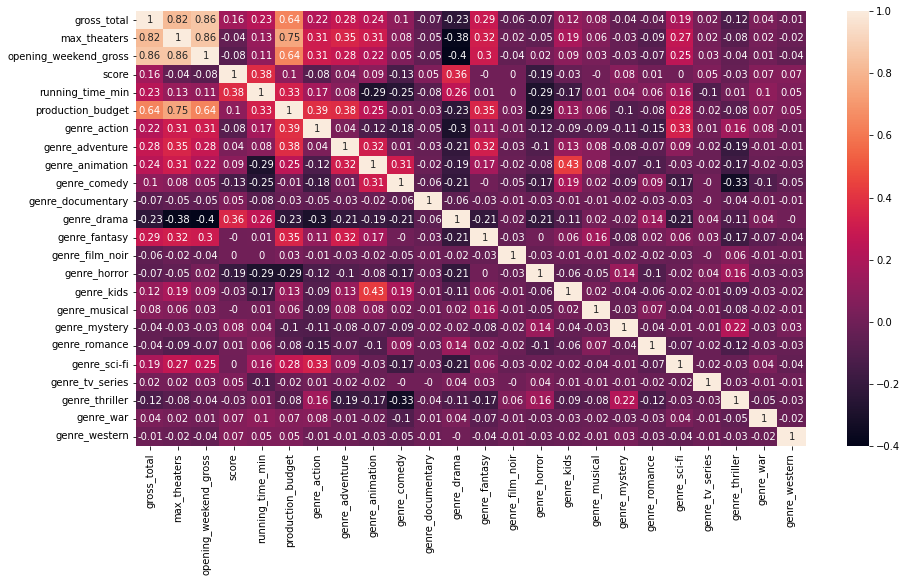

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(round(df.corr(method='spearman'), 2), annot=True, mask=None)
plt.show()

# Models

1. Predict Score (without total gross)
2. Total gross (without score)
3. Opening weekend gross (without total gross and score)

In [ ]:
from sklearn.model_selection import train_test_split

## Predict total gross



### Logistic Regression

In [ ]:
df["gross_total"].describe()

count    9.470000e+02
mean     7.613585e+07
std      1.000130e+08
min      4.413660e+05
25%      1.820988e+07
50%      4.287313e+07
75%      8.927927e+07
max      8.583730e+08
Name: gross_total, dtype: float64

In [ ]:
df.loc[df["gross_total"] <  1.724489e+07, "gross_total"] = 0
df.loc[(df["gross_total"] >= 1.724489e+07) & (df["gross_total"] < 3.750525e+07), "gross_total"] = 1
df.loc[(df["gross_total"] >=3.750525e+07) & (df["gross_total"] < 7.725884e+07), "gross_total"] = 2
df.loc[(df["gross_total"] >=7.725884e+07), "gross_total"] = 3

In [ ]:
df["gross_total"].value_counts()

3    272
2    235
1    226
0    214
Name: gross_total, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
y=df["gross_total"]
cols = list(df.columns)
scaler = MinMaxScaler()

df= scaler.fit_transform(df)
df = pd.DataFrame(df, columns=cols)

In [ ]:
df.head()

,gross_total,max_theaters,opening_weekend_gross,score,running_time_min,production_budget,genre_action,genre_adventure,genre_animation,genre_comedy,...,genre_horror,genre_kids,genre_musical,genre_mystery,genre_romance,genre_sci-fi,genre_tv_series,genre_thriller,genre_war,genre_western
0,1.0,0.892194,0.580847,0.083333,0.418719,0.562391,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.905283,0.450484,0.833333,0.788177,0.574894,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.841742,0.427097,0.616667,0.684729,0.199800,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.696335,0.247392,0.683333,0.684729,0.499875,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.832937,0.236898,0.750000,0.817734,0.499875,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_log = df.drop(columns=['score', 'gross_total'])
X = df_log
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000,multi_class="multinomial").fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [ ]:
score = clf.score(X_test, y_test)
print(score)
df_models_total_gross=df_models_total_gross=df_models_total_gross=df_models_total_gross.append({'name_model': 'Logistic Regression', 'score': round(score*100,2),'target': 'total_gross'},ignore_index=True)

0.5842105263157895


In [ ]:
prediccion(y_test,y_pred)

Validos:  111  / No validos:  79


### Random Forest Classifier


In [ ]:
rfc = RandomForestClassifier(n_estimators=2000,criterion="gini")
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
score = rfc.score(X_test, y_test)
print(score)
df_models_total_gross=df_models_total_gross.append({'name_model': 'Random Forest Classifier', 'score':round(score*100,2),'target': 'total_gross'},ignore_index=True)

0.7684210526315789


In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rfc))

Accuracy: 0.7684210526315789


In [ ]:
prediccion(y_test,y_pred_rfc)

Validos:  146  / No validos:  44


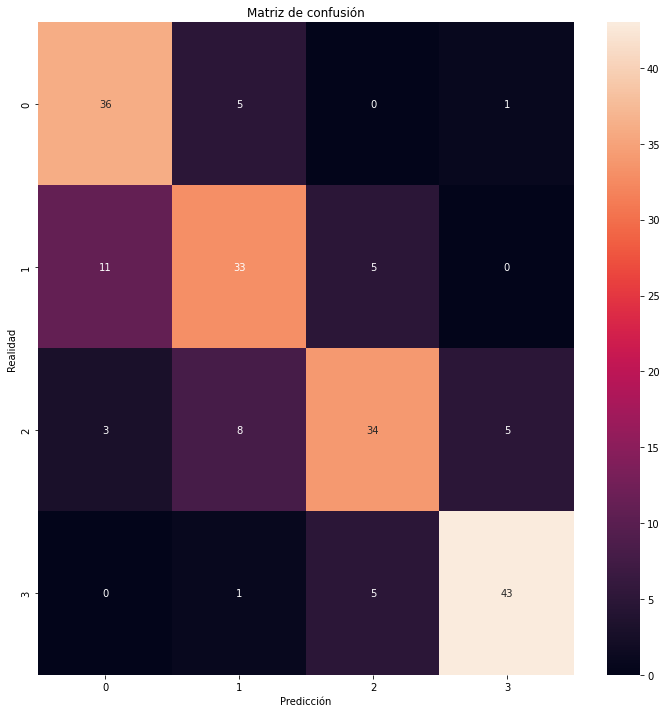


              precision    recall  f1-score   support

           0       0.72      0.86      0.78        42
           1       0.70      0.67      0.69        49
           2       0.77      0.68      0.72        50
           3       0.88      0.88      0.88        49

    accuracy                           0.77       190
   macro avg       0.77      0.77      0.77       190
weighted avg       0.77      0.77      0.77       190



In [ ]:
mostrar_resultados(y_test,y_pred_rfc)

### Decision Tree Classifier

In [ ]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=10,splitter="best")   
#Entrenamos
clf = dtc.fit(X_train, y_train)

In [ ]:
y_pred_dtc=dtc.predict(X_test)

In [ ]:
score=dtc.score(X_test,y_test)
df_models_total_gross=df_models_total_gross.append({'name_model': 'Decision Tree Classifier', 'score':round(score*100,2),'target': 'total_gross'},ignore_index=True)

In [ ]:
prediccion(y_test,y_pred_dtc)

Validos:  141  / No validos:  49


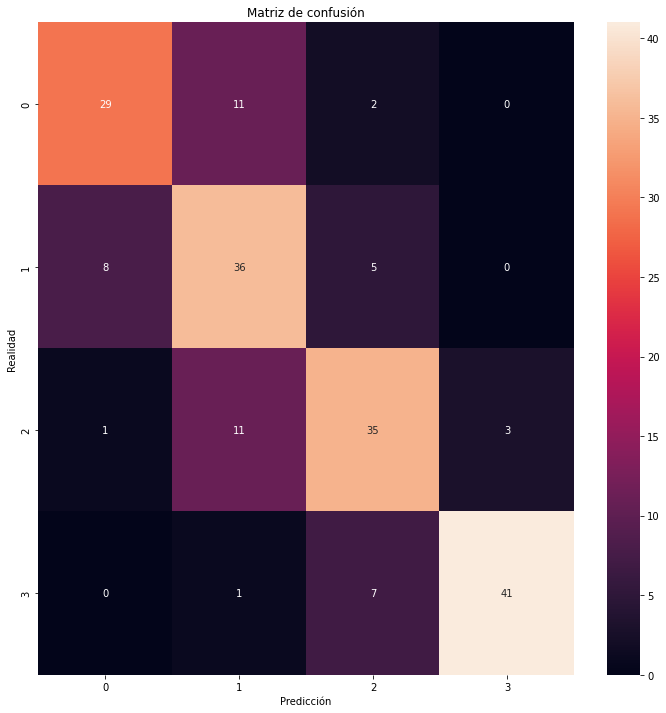


              precision    recall  f1-score   support

           0       0.76      0.69      0.72        42
           1       0.61      0.73      0.67        49
           2       0.71      0.70      0.71        50
           3       0.93      0.84      0.88        49

    accuracy                           0.74       190
   macro avg       0.75      0.74      0.75       190
weighted avg       0.75      0.74      0.75       190



In [ ]:
mostrar_resultados(y_test,y_pred_dtc)


### PCA (DTC)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
principalComponents = pca.fit_transform(df_log)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn import tree
dtc_pca = tree.DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=10,splitter="best")   
#Entrenamos
dtc_pca.fit(X_train, y_train)
y_pred_dtc_pca=dtc_pca.predict(X_test)

In [ ]:
score=dtc_pca.score(X_test,y_test)
df_models_total_gross=df_models_total_gross.append({'name_model': 'Decision Tree Classifier with PCA', 'score': round(score*100,2),'target': 'total_gross'},ignore_index=True)

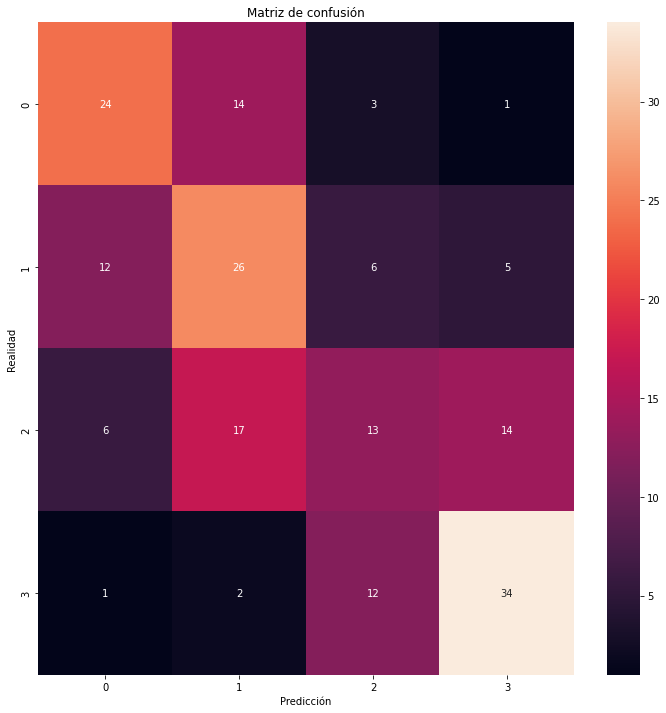


              precision    recall  f1-score   support

           0       0.56      0.57      0.56        42
           1       0.44      0.53      0.48        49
           2       0.38      0.26      0.31        50
           3       0.63      0.69      0.66        49

    accuracy                           0.51       190
   macro avg       0.50      0.51      0.50       190
weighted avg       0.50      0.51      0.50       190



In [ ]:
mostrar_resultados(y_test,y_pred_dtc_pca)

### Naive Bayes

In [ ]:
df_nb = df_original.drop(columns=['score', 'gross_total',])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_nb, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb= gnb.predict(X_test)
score=gnb.score(X_test,y_test)
df_models_total_gross=df_models_total_gross.append({'name_model': 'Naive Bayes', 'score': round(score*100,2),'target': 'total_gross'},ignore_index=True)

In [ ]:
prediccion(y_test,y_pred_gnb)

Validos:  131  / No validos:  59


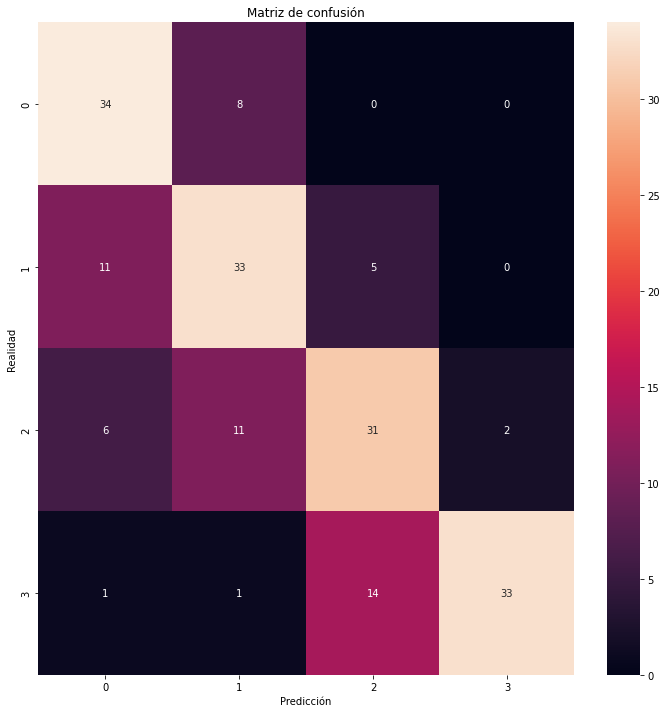


              precision    recall  f1-score   support

           0       0.65      0.81      0.72        42
           1       0.62      0.67      0.65        49
           2       0.62      0.62      0.62        50
           3       0.94      0.67      0.79        49

    accuracy                           0.69       190
   macro avg       0.71      0.69      0.69       190
weighted avg       0.71      0.69      0.69       190



In [ ]:
mostrar_resultados(y_test,y_pred_gnb)

### KNeighbors classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.utils import class_weight
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=4)
knc.fit(X_train, y_train)
y_pred_knc = knc.predict(X_test)
score = knc.score(X_test, y_test)
print(score)
df_models_total_gross=df_models_total_gross.append({'name_model': 'KNeighbors Classifier', 'score':round(score*100,2),'target': 'total_gross'},ignore_index=True)

0.4105263157894737


In [ ]:
prediccion(y_test,y_pred_knc)

Validos:  78  / No validos:  112


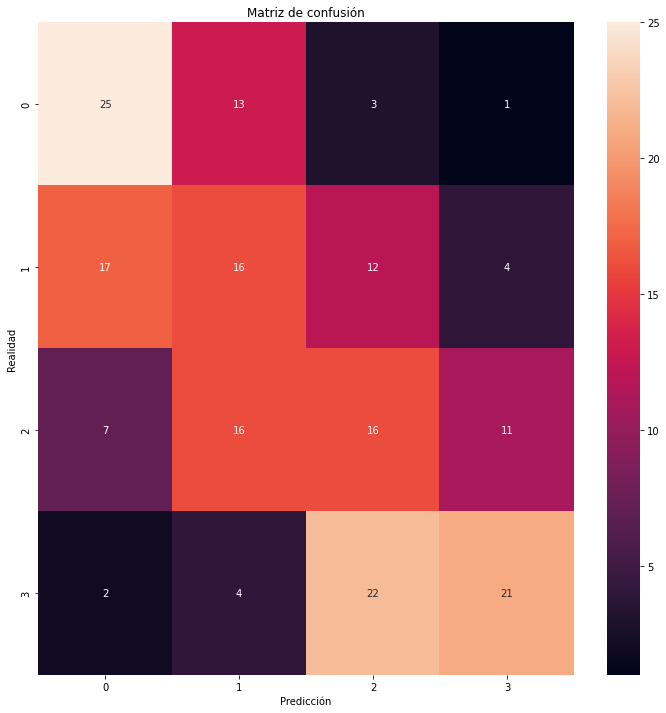


              precision    recall  f1-score   support

           0       0.49      0.60      0.54        42
           1       0.33      0.33      0.33        49
           2       0.30      0.32      0.31        50
           3       0.57      0.43      0.49        49

    accuracy                           0.41       190
   macro avg       0.42      0.42      0.42       190
weighted avg       0.42      0.41      0.41       190



In [ ]:
mostrar_resultados(y_test,y_pred_knc)

### Linear SVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn import svm
lsvc = svm.SVC(kernel='poly')

In [ ]:
lsvc.fit(X_train,y_train)

SVC(kernel='poly')

In [ ]:
y_pred_lsvc=lsvc.predict(X_test)
score=lsvc.score(X_test,y_test)
df_models_total_gross=df_models_total_gross.append({'name_model': 'Linear SVC', 'score': round(score*100,2),'target': 'total_gross'},ignore_index=True)

In [ ]:
prediccion(y_test,y_pred_lsvc)

Validos:  92  / No validos:  98


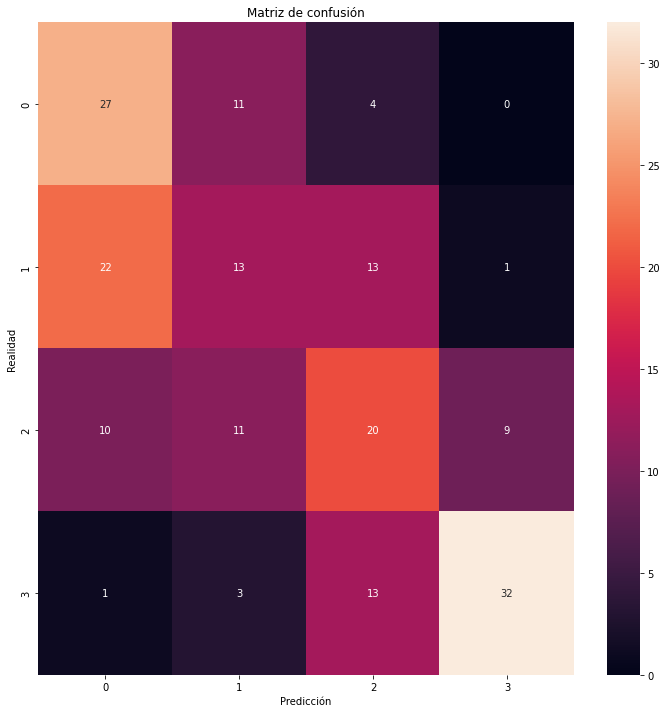


              precision    recall  f1-score   support

           0       0.45      0.64      0.53        42
           1       0.34      0.27      0.30        49
           2       0.40      0.40      0.40        50
           3       0.76      0.65      0.70        49

    accuracy                           0.48       190
   macro avg       0.49      0.49      0.48       190
weighted avg       0.49      0.48      0.48       190



In [ ]:
mostrar_resultados(y_test,y_pred_lsvc)

### Neural network

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers


In [ ]:
model = Sequential()
model.add(layers.Dense(30, input_dim = X_train.shape[1], activation = 'relu')) # input layer requires input_dim param
model.add(layers.Dense(15, activation = 'relu'))
model.add(layers.Dense(1, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs = 100, shuffle = True, batch_size=128, verbose=2)

Epoch 1/100
6/6 - 0s - loss: 0.0000e+00 - accuracy: 0.2338 - 464ms/epoch - 77ms/step
Epoch 2/100
6/6 - 0s - loss: 0.0000e+00 - accuracy: 0.2338 - 17ms/epoch - 3ms/step
Epoch 3/100
6/6 - 0s - loss: 0.0000e+00 - accuracy: 0.2338 - 14ms/epoch - 2ms/step
Epoch 4/100
6/6 - 0s - loss: 0.0000e+00 - accuracy: 0.2338 - 16ms/epoch - 3ms/step
Epoch 5/100
6/6 - 0s - loss: 0.0000e+00 - accuracy: 0.2338 - 18ms/epoch - 3ms/step
Epoch 6/100
6/6 - 0s - loss: 0.0000e+00 - accuracy: 0.2338 - 17ms/epoch - 3ms/step
Epoch 7/100
6/6 - 0s - loss: 0.0000e+00 - accuracy: 0.2338 - 16ms/epoch - 3ms/step
Epoch 8/100
6/6 - 0s - loss: 0.0000e+00 - accuracy: 0.2338 - 17ms/epoch - 3ms/step
Epoch 9/100
6/6 - 0s - loss: 0.0000e+00 - accuracy: 0.2338 - 18ms/epoch - 3ms/step
Epoch 10/100
6/6 - 0s - loss: 0.0000e+00 - accuracy: 0.2338 - 17ms/epoch - 3ms/step
Epoch 11/100
6/6 - 0s - loss: 0.0000e+00 - accuracy: 0.2338 - 15ms/epoch - 2ms/step
Epoch 12/100
6/6 - 0s - loss: 0.0000e+00 - accuracy: 0.2338 - 25ms/epoch - 4ms/step

In [ ]:
score = model.evaluate(X_test, y_test)
score=score[1]
df_models_total_gross=df_models_total_gross.append({'name_model': 'Neural network Classification', 'score': round(score*100,2),'target': 'total_gross'},ignore_index=True)

6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2579


In [ ]:
df_models_total_gross["score"]=df_models_total_gross["score"].astype(str)+"%"

### Results

In [ ]:
df_models_total_gross.to_csv("/content/df_tg.csv",index=False)#2012-2019

In [ ]:
df_models_total_gross#2000-2019

,name_model,score,target
0,Logistic Regression,59.46%,total_gross
1,Random Forest Classifier,77.66%,total_gross
2,Decision Tree Classifier,72.43%,total_gross
3,Decision Tree Classifier with PCA,49.01%,total_gross
4,Naive Bayes,72.97%,total_gross
5,KNeighbors Classifier,46.49%,total_gross
6,Linear SVC,55.68%,total_gross
7,Neural network Classification,24.68%,total_gross
